In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

df= pd.read_csv('data/car_price_prediction_.csv')
df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [8]:
X = df.drop('Price', axis = 1)
Y = df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state = 42)


In [9]:
# Divide the numerical categories
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()[:-1]

# Divide the categorical categories
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Instantiate the scaler
numerical_transformer = StandardScaler()

# Instantiate the one-hot encoder
categorical_transformer = OneHotEncoder(drop='first')


In [10]:
preprocesor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(
    steps = [
        ('preprocesor', preprocesor),
        ('regresor', LinearRegression())
    ]
)

In [11]:
# Im going to train my model and store my predictions

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [13]:

print(f'''
Metrics:
RMSE: {np.sqrt(mean_squared_error(y_pred, Y_test))},
MSE: {mean_squared_error(y_pred, Y_test)}
R2: {r2_score(Y_test, y_pred)}
''')




Metrics:
RMSE: 27845.739751925947,
MSE: 775385222.3319888
R2: -0.02400131548454354



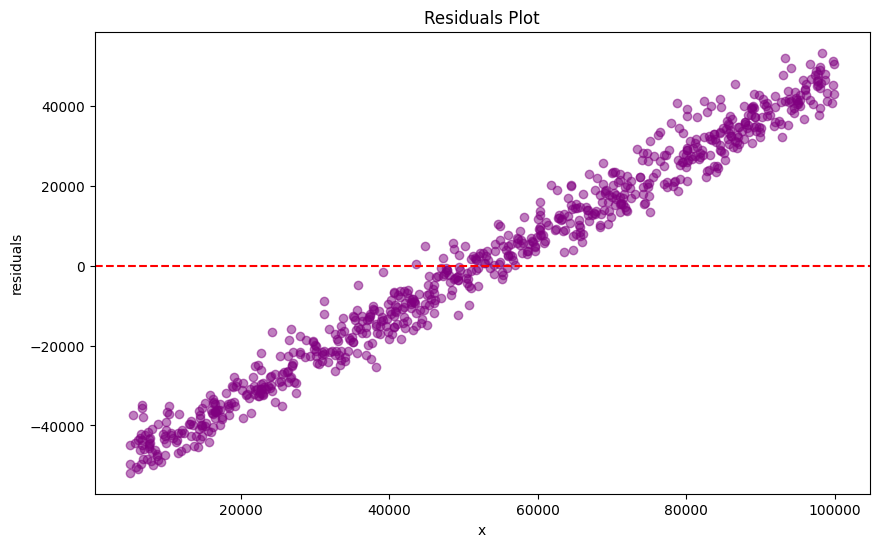

In [15]:
residuals = Y_test - y_pred
residuals = residuals.values

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, color = 'purple', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle ='--')
plt.title('Residuals Plot')
plt.xlabel('x')
plt.ylabel('residuals')

plt.show()


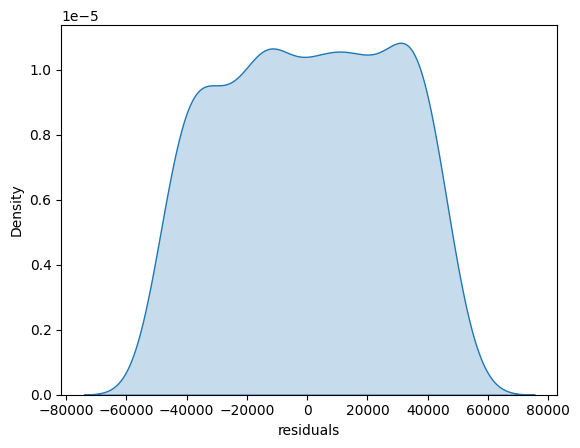

I like how our residuals perform in this graph, its very close from a normal distribution


In [16]:
res_df = pd.DataFrame({'residuals':residuals})
sns.kdeplot(res_df, x = 'residuals', fill=True)
plt.show()
print("I like how our residuals perform in this graph, its very close from a normal distribution")

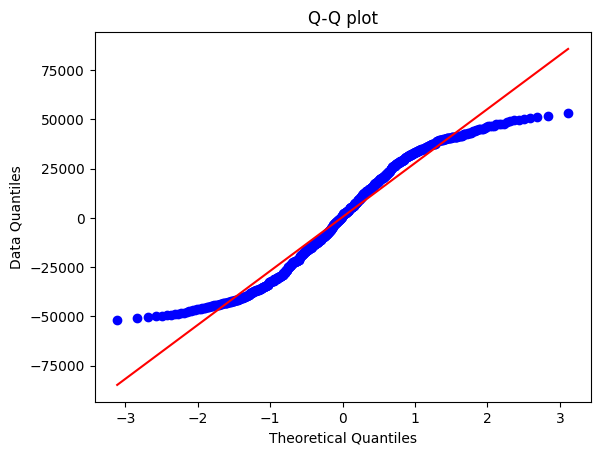

Our Q-Q plot looks pretty good, its very likely our dataset will follow a normal distribution


In [17]:
(osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist='norm', plot = plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Data Quantiles')
plt.show()
print("Our Q-Q plot looks pretty good, its very likely our dataset will follow a normal distribution")

In [18]:
# Perform the Shapiro-Wilk test on the residuals
statistic, p_value = stats.shapiro(residuals)

# Print the test statistic
print(f'Statistic: {statistic}')
# Print the p-value from the test
print(f'p-value: {p_value}')

# Set the significance level (alpha) to 0.05
alpha = 0.05

# Check the result of the test against the significance level
if p_value <= alpha:
    # If p-value is less than or equal to 0.05, we reject the null hypothesis
    print('We reject the null hypothesis. The data does not follow a normal distribution.')
else:
    # If p-value is greater than 0.05, we fail to reject the null hypothesis
    print('We fail to reject the null hypothesis. The data might follow a normal distribution.')
    


Statistic: 0.959428071975708
p-value: 1.516888828087537e-13
We reject the null hypothesis. The data does not follow a normal distribution.
